In [1]:
import datetime

import pandas as pd
import spacy
import re
import string

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

from spacy.tokens import Token
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.corpus import stopwords

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from varclushi import VarClusHi

In [8]:
#### Importing the file ####
Path="src/"
Filename='projects_Preprocessed.csv'
df=pd.read_csv(Path+Filename)

Cat_File="category_hier.csv"
Cat_data=pd.read_csv(Path+Cat_File)

## Filtering the null abstracts & short description
df=df[(pd.isnull(df.PreProcessedDescription)==False) & (df.PreProcessedDescription.str.strip()!='abstract available')& (df.PreProcessedDescription.str.len()>100)]

In [45]:
merged_data=df.merge(Cat_data[["File_Categories","Category"]], how="left", left_on="SubjectArea", right_on="File_Categories")

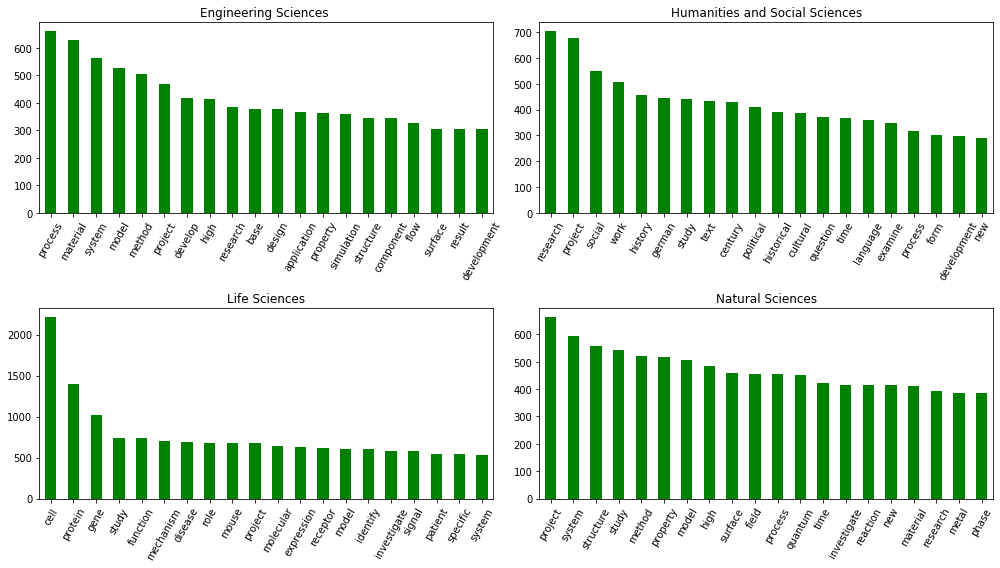

In [46]:
# TF IDF Conversion

vectorizer = TfidfVectorizer(max_features=500) #ngram_range=(2, 2)
review_vectors = vectorizer.fit_transform(merged_data["PreProcessedDescription"])
features_df = pd.DataFrame(review_vectors.toarray(), columns = vectorizer.get_feature_names())

features_df.reset_index(drop=True, inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data=pd.concat([merged_data,features_df], axis=1,ignore_index=False)

wordslist=merged_data.columns.tolist()[len(df.columns)+2:]

plt.subplots(figsize=(14,8)) 
i=1
for cat,bucket in merged_data.groupby('Category'):
    
    plt.subplot(2,2,i)
    bucket[wordslist].sum().sort_values(ascending=False).head(20).plot(kind='bar',color='green')
    plt.title(cat)
    plt.xticks(rotation=60)
    
    i=i+1
    plt.tight_layout()

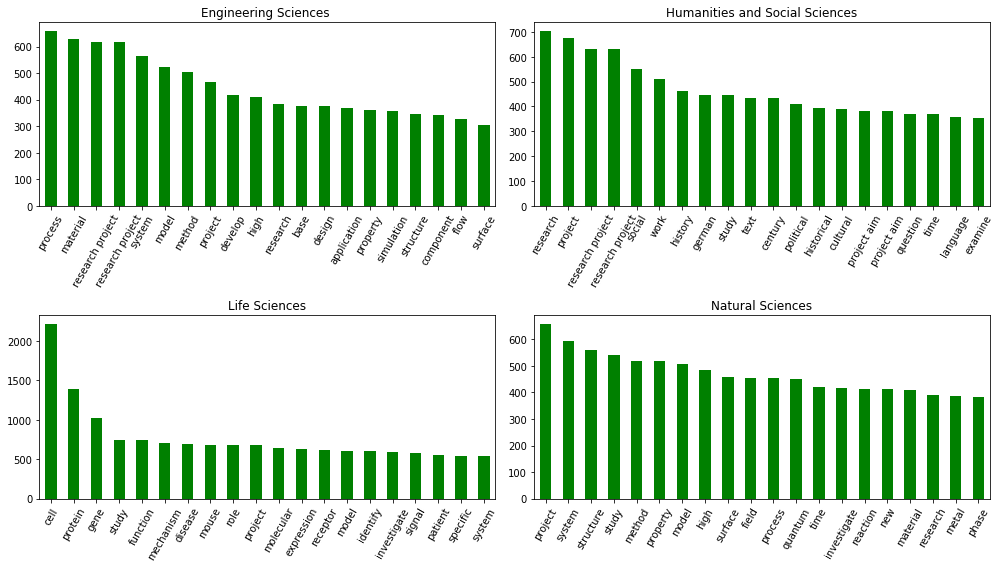

In [52]:
# TF IDF Conversion
merged_data12=merged_data.drop(columns=merged_data.columns.tolist()[len(df.columns)+2:])

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500) #ngram_range=(2, 2)
review_vectors = vectorizer.fit_transform(merged_data12["PreProcessedDescription"])
features_df = pd.DataFrame(review_vectors.toarray(), columns = vectorizer.get_feature_names())

features_df.reset_index(drop=True, inplace=True)
merged_data12.reset_index(drop=True, inplace=True)
merged_data12=pd.concat([merged_data2,features_df], axis=1,ignore_index=False)

wordslist=merged_data12.columns.tolist()[len(df.columns)+2:]

plt.subplots(figsize=(14,8)) 
i=1
for cat,bucket in merged_data12.groupby('Category'):
    
    plt.subplot(2,2,i)
    bucket[wordslist].sum().sort_values(ascending=False).head(20).plot(kind='bar',color='green')
    plt.title(cat)
    plt.xticks(rotation=60)
    
    i=i+1
    plt.tight_layout()

In [59]:
#len(merged_data12.columns)
pd.Series([len(i.split())  for i in merged_data12.columns]).value_counts()

1    507
2    505
dtype: int64

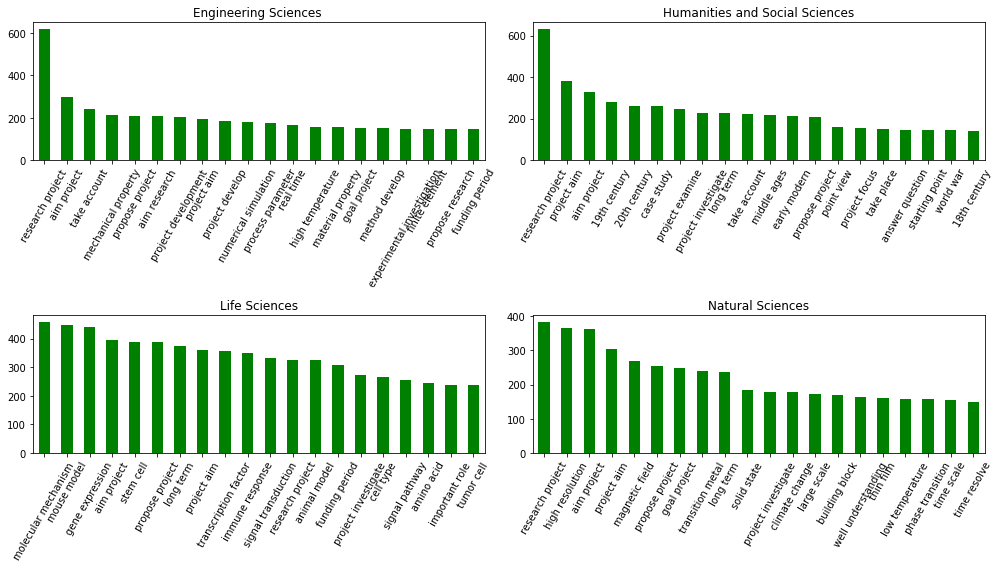

In [51]:
# TF IDF Conversion
merged_data2=merged_data.drop(columns=merged_data.columns.tolist()[len(df.columns)+2:])

vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=500) #ngram_range=(2, 2)
review_vectors = vectorizer.fit_transform(merged_data2["PreProcessedDescription"])
features_df = pd.DataFrame(review_vectors.toarray(), columns = vectorizer.get_feature_names())

features_df.reset_index(drop=True, inplace=True)
merged_data2.reset_index(drop=True, inplace=True)
merged_data2=pd.concat([merged_data2,features_df], axis=1,ignore_index=False)

wordslist=merged_data2.columns.tolist()[len(df.columns)+2:]

plt.subplots(figsize=(14,8)) 
i=1
for cat,bucket in merged_data2.groupby('Category'):
    
    plt.subplot(2,2,i)
    bucket[wordslist].sum().sort_values(ascending=False).head(20).plot(kind='bar',color='green')
    plt.title(cat)
    plt.xticks(rotation=60)
    
    i=i+1
    plt.tight_layout()

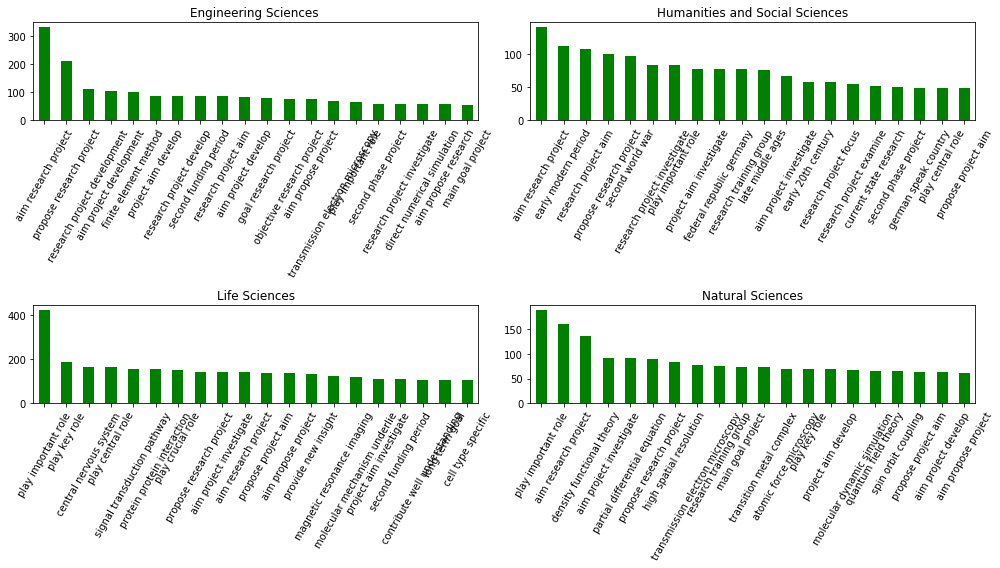

In [62]:
# TF IDF Conversion
merged_data13=merged_data.drop(columns=merged_data.columns.tolist()[len(df.columns)+2:])

vectorizer = TfidfVectorizer(ngram_range=(3, 3), max_features=500) #ngram_range=(2, 2)
review_vectors = vectorizer.fit_transform(merged_data13["PreProcessedDescription"])
features_df = pd.DataFrame(review_vectors.toarray(), columns = vectorizer.get_feature_names())

features_df.reset_index(drop=True, inplace=True)
merged_data13.reset_index(drop=True, inplace=True)
merged_data13=pd.concat([merged_data13,features_df], axis=1,ignore_index=False)

wordslist=merged_data13.columns.tolist()[len(df.columns)+2:]

plt.subplots(figsize=(14,8)) 
i=1
for cat,bucket in merged_data13.groupby('Category'):
    
    plt.subplot(2,2,i)
    bucket[wordslist].sum().sort_values(ascending=False).head(20).plot(kind='bar',color='green')
    plt.title(cat)
    plt.xticks(rotation=60)
    
    i=i+1
    plt.tight_layout()

In [63]:
#len(merged_data12.columns)
pd.Series([len(i.split())  for i in merged_data13.columns]).value_counts()

3    500
1     12
dtype: int64

In [73]:
demo1_vc = VarClusHi(merged_data[merged_data.columns.tolist()[len(df.columns)+2:]].head(500),maxeigval2=1,maxclus=10)
demo1_vc.varclus()

In [74]:
demo1_vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,52,7.364460,1.731293,0.141624
1,1,98,4.967603,2.234769,0.050690
2,2,54,3.365032,1.978882,0.062315
3,3,82,2.858906,2.233450,0.034865
4,4,56,3.295898,2.077077,0.058855
5,5,24,2.906611,1.563184,0.121109
6,6,31,2.368083,1.904764,0.076390
7,7,53,2.834143,1.961272,0.053474
8,8,14,2.200874,1.262857,0.157205
9,9,36,2.572422,2.114636,0.071456


In [78]:
#[print(i, w['Variable'].unique) for i,w in demo1_vc.rsquare.groupby('Cluster')]
demo1_vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,application,0.119055,0.031716,0.909800
1,0,base,0.180507,0.008396,0.826432
2,0,compound,0.001609,0.003403,1.001800
3,0,description,0.287514,0.014526,0.722988
4,0,direct,0.002207,0.003039,1.000834
5,0,enable,0.524465,0.011434,0.481035
6,0,examine,0.009314,0.005251,0.995916
7,0,example,0.003110,0.001280,0.998168
8,0,form,0.006430,0.043444,1.038696
9,0,gain,0.001818,0.006530,1.004742
